In [573]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [574]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [575]:
NUM_CLASSES = 12

# Dataset reading

In [576]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42) + 1)))

In [577]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [579]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [580]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_54 (Dropout)        (None, 42)                0         
                                                                 
 dense_81 (Dense)            (None, 20)                860       
                                                                 
 dropout_55 (Dropout)        (None, 20)                0         
                                                                 
 dense_82 (Dense)            (None, 10)                210       
                                                                 
 dense_83 (Dense)            (None, 12)                132       
                                                                 
Total params: 1,202
Trainable params: 1,202
Non-trainable params: 0
_________________________________________________________________


In [581]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [582]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [583]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.5004 - accuracy: 0.0938
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 1s 334ms/step - loss: 2.5059 - accuracy: 0.1069 - val_loss: 2.5116 - val_accuracy: 0.1481
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.5017 - accuracy: 0.1172
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 67ms/step - loss: 2.5052 - accuracy: 0.1258 - val_loss: 2.5069 - val_accuracy: 0.1481
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.4943 - accuracy: 0.1172
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 2.5014 - accuracy: 0.1069 - val_loss: 2.5021 - val_accuracy: 0.1481
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.4904 - accuracy: 0.1328
Epoch 4: sa

2/2 [==============================] - 0s 58ms/step - loss: 2.4003 - accuracy: 0.1698 - val_loss: 2.4180 - val_accuracy: 0.1481
Epoch 29/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.3914 - accuracy: 0.1406
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 2.3863 - accuracy: 0.1572 - val_loss: 2.4153 - val_accuracy: 0.1852
Epoch 30/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.4004 - accuracy: 0.1562
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 2.3932 - accuracy: 0.1572 - val_loss: 2.4128 - val_accuracy: 0.1852
Epoch 31/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.4042 - accuracy: 0.1328
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 2.4054 - accuracy: 0.1321 - val_loss: 2.

Epoch 56/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.2723 - accuracy: 0.1953
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 2.2774 - accuracy: 0.1950 - val_loss: 2.3154 - val_accuracy: 0.2963
Epoch 57/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.2838 - accuracy: 0.2344
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 2.2770 - accuracy: 0.2264 - val_loss: 2.3099 - val_accuracy: 0.2963
Epoch 58/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.2389 - accuracy: 0.2578
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 2.2551 - accuracy: 0.2516 - val_loss: 2.3041 - val_accuracy: 0.2778
Epoch 59/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.2797 - accuracy: 0.2188
Epoch

1/2 [==============>...............] - ETA: 0s - loss: 2.0847 - accuracy: 0.2422
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 2.0628 - accuracy: 0.2453 - val_loss: 2.1128 - val_accuracy: 0.2593
Epoch 84/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.1028 - accuracy: 0.2578
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 2.1110 - accuracy: 0.2579 - val_loss: 2.1052 - val_accuracy: 0.2593
Epoch 85/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.0707 - accuracy: 0.2812
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 2.0525 - accuracy: 0.2956 - val_loss: 2.0977 - val_accuracy: 0.2593
Epoch 86/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.0447 - accuracy: 0.3047
Epoch 86: saving mo

1/2 [==============>...............] - ETA: 0s - loss: 1.9440 - accuracy: 0.2266
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 1.9284 - accuracy: 0.2327 - val_loss: 1.9128 - val_accuracy: 0.3519
Epoch 111/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.9337 - accuracy: 0.3359
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.9510 - accuracy: 0.3082 - val_loss: 1.9064 - val_accuracy: 0.3148
Epoch 112/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8532 - accuracy: 0.3125
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.9017 - accuracy: 0.2830 - val_loss: 1.8998 - val_accuracy: 0.3333
Epoch 113/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8910 - accuracy: 0.3203
Epoch 113: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.7572 - accuracy: 0.2969
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.7784 - accuracy: 0.2704 - val_loss: 1.7612 - val_accuracy: 0.3333
Epoch 138/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7982 - accuracy: 0.3125
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.7974 - accuracy: 0.3145 - val_loss: 1.7565 - val_accuracy: 0.3333
Epoch 139/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8401 - accuracy: 0.2656
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 1.7988 - accuracy: 0.2704 - val_loss: 1.7519 - val_accuracy: 0.3519
Epoch 140/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7313 - accuracy: 0.3281
Epoch 140: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.6948 - accuracy: 0.3750
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.6784 - accuracy: 0.3836 - val_loss: 1.6212 - val_accuracy: 0.3704
Epoch 165/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6497 - accuracy: 0.4219
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.6869 - accuracy: 0.3774 - val_loss: 1.6162 - val_accuracy: 0.3704
Epoch 166/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6410 - accuracy: 0.3594
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.6381 - accuracy: 0.3648 - val_loss: 1.6112 - val_accuracy: 0.3704
Epoch 167/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6742 - accuracy: 0.3438
Epoch 167: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.5719 - accuracy: 0.3203
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.5671 - accuracy: 0.3459 - val_loss: 1.4921 - val_accuracy: 0.4259
Epoch 192/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6726 - accuracy: 0.3750
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 1.6329 - accuracy: 0.4025 - val_loss: 1.4866 - val_accuracy: 0.4074
Epoch 193/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5266 - accuracy: 0.3984
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 1.5330 - accuracy: 0.3962 - val_loss: 1.4814 - val_accuracy: 0.4074
Epoch 194/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5808 - accuracy: 0.3516
Epoch 194: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.5311 - accuracy: 0.4219
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.4981 - accuracy: 0.4403 - val_loss: 1.3657 - val_accuracy: 0.5185
Epoch 219/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5050 - accuracy: 0.4297
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.4965 - accuracy: 0.4277 - val_loss: 1.3609 - val_accuracy: 0.5185
Epoch 220/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5168 - accuracy: 0.4219
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.5029 - accuracy: 0.4654 - val_loss: 1.3562 - val_accuracy: 0.5370
Epoch 221/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4462 - accuracy: 0.4375
Epoch 221: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.3256 - accuracy: 0.5156
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 67ms/step - loss: 1.3391 - accuracy: 0.5094 - val_loss: 1.2340 - val_accuracy: 0.6111
Epoch 246/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4229 - accuracy: 0.5234
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.4478 - accuracy: 0.4969 - val_loss: 1.2300 - val_accuracy: 0.6111
Epoch 247/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3926 - accuracy: 0.4688
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.3988 - accuracy: 0.4780 - val_loss: 1.2261 - val_accuracy: 0.6111
Epoch 248/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3923 - accuracy: 0.4609
Epoch 248: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2701 - accuracy: 0.5312
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.2918 - accuracy: 0.5472 - val_loss: 1.1273 - val_accuracy: 0.6296
Epoch 273/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2803 - accuracy: 0.5547
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.2591 - accuracy: 0.5472 - val_loss: 1.1244 - val_accuracy: 0.6296
Epoch 274/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3055 - accuracy: 0.4609
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.2871 - accuracy: 0.4906 - val_loss: 1.1216 - val_accuracy: 0.6296
Epoch 275/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3440 - accuracy: 0.5000
Epoch 275: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2995 - accuracy: 0.5000
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 1.3183 - accuracy: 0.4906 - val_loss: 1.0232 - val_accuracy: 0.6667
Epoch 300/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3113 - accuracy: 0.5000
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 82ms/step - loss: 1.2984 - accuracy: 0.5031 - val_loss: 1.0204 - val_accuracy: 0.6852
Epoch 301/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2379 - accuracy: 0.5391
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.2193 - accuracy: 0.5597 - val_loss: 1.0181 - val_accuracy: 0.6852
Epoch 302/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2736 - accuracy: 0.5234
Epoch 302: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2316 - accuracy: 0.5312
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.2329 - accuracy: 0.5472 - val_loss: 0.9481 - val_accuracy: 0.7037
Epoch 327/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1945 - accuracy: 0.5625
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 80ms/step - loss: 1.1873 - accuracy: 0.5597 - val_loss: 0.9451 - val_accuracy: 0.6852
Epoch 328/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1643 - accuracy: 0.5547
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.1623 - accuracy: 0.5535 - val_loss: 0.9418 - val_accuracy: 0.6852
Epoch 329/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1895 - accuracy: 0.5938
Epoch 329: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2117 - accuracy: 0.5312
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.2292 - accuracy: 0.5220 - val_loss: 0.8769 - val_accuracy: 0.7037
Epoch 354/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1349 - accuracy: 0.5469
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.1342 - accuracy: 0.5346 - val_loss: 0.8736 - val_accuracy: 0.7037
Epoch 355/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1557 - accuracy: 0.5391
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.1196 - accuracy: 0.5660 - val_loss: 0.8705 - val_accuracy: 0.7037
Epoch 356/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0846 - accuracy: 0.5938
Epoch 356: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.1024 - accuracy: 0.5469
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.1219 - accuracy: 0.5597 - val_loss: 0.8224 - val_accuracy: 0.7037
Epoch 381/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0423 - accuracy: 0.6094
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 67ms/step - loss: 1.0644 - accuracy: 0.5912 - val_loss: 0.8197 - val_accuracy: 0.7037
Epoch 382/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1123 - accuracy: 0.5625
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.1455 - accuracy: 0.5535 - val_loss: 0.8174 - val_accuracy: 0.7037
Epoch 383/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1055 - accuracy: 0.6328
Epoch 383: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9446 - accuracy: 0.6719
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.9603 - accuracy: 0.6478 - val_loss: 0.7650 - val_accuracy: 0.7222
Epoch 408/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0793 - accuracy: 0.6172
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0657 - accuracy: 0.6164 - val_loss: 0.7623 - val_accuracy: 0.7222
Epoch 409/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0847 - accuracy: 0.6172
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.1259 - accuracy: 0.5849 - val_loss: 0.7602 - val_accuracy: 0.7222
Epoch 410/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9869 - accuracy: 0.6250
Epoch 410: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.0106 - accuracy: 0.6406
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0034 - accuracy: 0.6415 - val_loss: 0.7335 - val_accuracy: 0.7222
Epoch 435/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0829 - accuracy: 0.6250
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.0428 - accuracy: 0.6478 - val_loss: 0.7306 - val_accuracy: 0.7222
Epoch 436/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0201 - accuracy: 0.5938
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.0487 - accuracy: 0.5912 - val_loss: 0.7276 - val_accuracy: 0.7222
Epoch 437/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9421 - accuracy: 0.6406
Epoch 437: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9522 - accuracy: 0.6250
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.9573 - accuracy: 0.6352 - val_loss: 0.7006 - val_accuracy: 0.7222
Epoch 462/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0001 - accuracy: 0.6094
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0182 - accuracy: 0.5912 - val_loss: 0.7007 - val_accuracy: 0.7222
Epoch 463/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0345 - accuracy: 0.5859
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.0640 - accuracy: 0.5535 - val_loss: 0.6994 - val_accuracy: 0.7222
Epoch 464/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9967 - accuracy: 0.6016
Epoch 464: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9164 - accuracy: 0.6797
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 0.9276 - accuracy: 0.6604 - val_loss: 0.6666 - val_accuracy: 0.7593
Epoch 489/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0628 - accuracy: 0.5000
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0514 - accuracy: 0.5220 - val_loss: 0.6660 - val_accuracy: 0.7593
Epoch 490/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9663 - accuracy: 0.6797
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.9510 - accuracy: 0.6730 - val_loss: 0.6647 - val_accuracy: 0.7778
Epoch 491/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0158 - accuracy: 0.6094
Epoch 491: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9530 - accuracy: 0.6250
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.9589 - accuracy: 0.6164 - val_loss: 0.6277 - val_accuracy: 0.7963
Epoch 516/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0063 - accuracy: 0.5469
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 1.0054 - accuracy: 0.5535 - val_loss: 0.6277 - val_accuracy: 0.7778
Epoch 517/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9169 - accuracy: 0.7031
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.9070 - accuracy: 0.6981 - val_loss: 0.6276 - val_accuracy: 0.7593
Epoch 518/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9677 - accuracy: 0.6094
Epoch 518: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9603 - accuracy: 0.5859
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.9555 - accuracy: 0.5912 - val_loss: 0.6120 - val_accuracy: 0.8148
Epoch 543/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0106 - accuracy: 0.5703
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.0283 - accuracy: 0.5723 - val_loss: 0.6122 - val_accuracy: 0.8148
Epoch 544/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9159 - accuracy: 0.7031
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.9121 - accuracy: 0.6918 - val_loss: 0.6122 - val_accuracy: 0.8148
Epoch 545/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8425 - accuracy: 0.6875
Epoch 545: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.0575 - accuracy: 0.5781
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.0393 - accuracy: 0.5975 - val_loss: 0.5818 - val_accuracy: 0.9815
Epoch 570/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0468 - accuracy: 0.6250
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0391 - accuracy: 0.6164 - val_loss: 0.5808 - val_accuracy: 0.9815
Epoch 571/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9215 - accuracy: 0.5859
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.8821 - accuracy: 0.6038 - val_loss: 0.5795 - val_accuracy: 0.9815
Epoch 572/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8506 - accuracy: 0.7188
Epoch 572: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9040 - accuracy: 0.6641
Epoch 596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 0.9109 - accuracy: 0.6792 - val_loss: 0.5510 - val_accuracy: 0.9815
Epoch 597/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9422 - accuracy: 0.6953
Epoch 597: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.9629 - accuracy: 0.6918 - val_loss: 0.5494 - val_accuracy: 0.9815
Epoch 598/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8672 - accuracy: 0.6875
Epoch 598: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.8839 - accuracy: 0.6792 - val_loss: 0.5475 - val_accuracy: 0.9815
Epoch 599/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9439 - accuracy: 0.6328
Epoch 599: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9529 - accuracy: 0.6406
Epoch 623: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 0.9314 - accuracy: 0.6541 - val_loss: 0.5328 - val_accuracy: 0.9630
Epoch 624/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8903 - accuracy: 0.6250
Epoch 624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.8827 - accuracy: 0.6289 - val_loss: 0.5333 - val_accuracy: 0.9444
Epoch 625/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9012 - accuracy: 0.6250
Epoch 625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 66ms/step - loss: 0.8987 - accuracy: 0.6352 - val_loss: 0.5336 - val_accuracy: 0.9259
Epoch 626/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8559 - accuracy: 0.6562
Epoch 626: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9098 - accuracy: 0.6328
Epoch 650: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.9186 - accuracy: 0.6289 - val_loss: 0.5109 - val_accuracy: 0.9815
Epoch 651/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9785 - accuracy: 0.6250
Epoch 651: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.9687 - accuracy: 0.6289 - val_loss: 0.5096 - val_accuracy: 0.9815
Epoch 652/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9355 - accuracy: 0.6250
Epoch 652: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.9386 - accuracy: 0.6101 - val_loss: 0.5086 - val_accuracy: 0.9815
Epoch 653/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8710 - accuracy: 0.6875
Epoch 653: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8588 - accuracy: 0.6484
Epoch 677: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.8342 - accuracy: 0.6604 - val_loss: 0.4921 - val_accuracy: 0.9815
Epoch 678/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8986 - accuracy: 0.6094
Epoch 678: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.8941 - accuracy: 0.6164 - val_loss: 0.4910 - val_accuracy: 0.9815
Epoch 679/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8285 - accuracy: 0.6719
Epoch 679: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.8307 - accuracy: 0.6730 - val_loss: 0.4897 - val_accuracy: 0.9815
Epoch 680/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8097 - accuracy: 0.6953
Epoch 680: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7641 - accuracy: 0.6875
Epoch 704: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 66ms/step - loss: 0.7677 - accuracy: 0.6981 - val_loss: 0.4713 - val_accuracy: 0.9815
Epoch 705/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9245 - accuracy: 0.6250
Epoch 705: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.9245 - accuracy: 0.6541 - val_loss: 0.4722 - val_accuracy: 0.9815
Epoch 706/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7156 - accuracy: 0.7734
Epoch 706: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.7098 - accuracy: 0.7799 - val_loss: 0.4735 - val_accuracy: 0.9815
Epoch 707/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8798 - accuracy: 0.6719
Epoch 707: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8756 - accuracy: 0.6484
Epoch 731: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.9353 - accuracy: 0.6226 - val_loss: 0.4599 - val_accuracy: 0.9815
Epoch 732/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8047 - accuracy: 0.7109
Epoch 732: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.7734 - accuracy: 0.7233 - val_loss: 0.4597 - val_accuracy: 0.9815
Epoch 733/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9222 - accuracy: 0.6406
Epoch 733: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.8487 - accuracy: 0.6730 - val_loss: 0.4595 - val_accuracy: 0.9815
Epoch 734/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7388 - accuracy: 0.7656
Epoch 734: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8898 - accuracy: 0.6484
Epoch 758: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.8758 - accuracy: 0.6667 - val_loss: 0.4369 - val_accuracy: 0.9815
Epoch 759/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8580 - accuracy: 0.6719
Epoch 759: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 78ms/step - loss: 0.8166 - accuracy: 0.6918 - val_loss: 0.4362 - val_accuracy: 0.9815
Epoch 760/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8808 - accuracy: 0.6797
Epoch 760: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.8289 - accuracy: 0.6981 - val_loss: 0.4355 - val_accuracy: 0.9815
Epoch 761/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8065 - accuracy: 0.7109
Epoch 761: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7903 - accuracy: 0.6953
Epoch 785: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 66ms/step - loss: 0.7776 - accuracy: 0.7107 - val_loss: 0.4188 - val_accuracy: 0.9815
Epoch 786/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8508 - accuracy: 0.6562
Epoch 786: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 0.8257 - accuracy: 0.6667 - val_loss: 0.4186 - val_accuracy: 0.9815
Epoch 787/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7928 - accuracy: 0.6797
Epoch 787: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 0.7811 - accuracy: 0.6730 - val_loss: 0.4187 - val_accuracy: 0.9815
Epoch 788/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7353 - accuracy: 0.7188
Epoch 788: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7935 - accuracy: 0.7031
Epoch 812: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.7742 - accuracy: 0.7107 - val_loss: 0.3994 - val_accuracy: 0.9815
Epoch 813/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8549 - accuracy: 0.6406
Epoch 813: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.7899 - accuracy: 0.6855 - val_loss: 0.3972 - val_accuracy: 0.9815
Epoch 814/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8132 - accuracy: 0.6641
Epoch 814: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.8023 - accuracy: 0.6792 - val_loss: 0.3957 - val_accuracy: 0.9815
Epoch 815/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7555 - accuracy: 0.7109
Epoch 815: sa

In [584]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 22ms/step - loss: 0.4072 - accuracy: 0.9815


In [585]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [586]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 73ms/step
[6.50074363e-01 5.74698861e-05 9.91153251e-03 3.66393069e-04
 3.26756060e-01 1.54834182e-03 7.83947087e-07 4.04624245e-07
 1.12644965e-02 1.82029794e-06 1.52898356e-05 3.06156767e-06]
0


# Confusion matrix

2/2 [==============================] - 0s 2ms/step


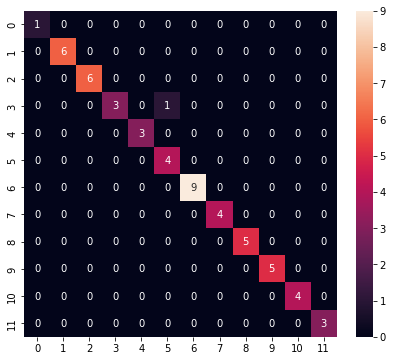

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.99      0.98      0.98        54



In [587]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [588]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [589]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmpfspnams5\assets


INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmpfspnams5\assets


6920

# Inference test

In [590]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [591]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [592]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [593]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [594]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.5007454e-01 5.7469846e-05 9.9115307e-03 3.6639260e-04 3.2675585e-01
 1.5483400e-03 7.8394430e-07 4.0462282e-07 1.1264493e-02 1.8202950e-06
 1.5289810e-05 3.0615656e-06]
0
